In [3]:
import pandas as pd
import pickle
from skimage.transform import rescale
import imageio
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer


with open('/home/aniket/Documents/Images/elevation.pickle', 'rb') as f:
    df = pickle.load(f)

with open('/home/aniket/Documents/Images/traversability.pickle', 'rb') as f:
    df1 = pickle.load(f)
    
df.shape, df1.shape

((4057, 5), (4057, 5))

In [4]:
X_e = list(df['image'].values)
X_e= np.array(X_e)
X_e = X_e.reshape(X_e.shape[0], -1)
y_e = df['pitch'].values

discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
y_e_l = discretizer.fit_transform(y_e.reshape(-1, 1)).ravel()


X_t = list(df1['image'].values)
X_t = np.array(X_t)
X_t = X_t.reshape(X_t.shape[0], -1)
y_t = df1['pitch'].values

X_e.shape, y_e.shape, X_t.shape, y_t.shape



((4057, 80000), (4057,), (4057, 80000), (4057,))

In [5]:
f = y_e.tolist()
z = y_t.tolist()
ze = []
for i in range (len(f)):
    if (abs(f[i] - z[i]) < 0.6):
        ze.append(i)
      
xd1 = X_e[ze]
xd2 = X_t[ze]
yd1 = y_e[ze]
yd2 = y_t[ze]
yd1_l = y_e_l[ze]
sum(ze) / len(ze), min(ze), max(ze) , len(ze), xd1.shape, xd2.shape, yd1.shape, yd2.shape, yd1_l.shape

(2021.3070611636,
 0,
 4056,
 4022,
 (4022, 80000),
 (4022, 80000),
 (4022,),
 (4022,),
 (4022,))

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(xd1, yd1, test_size=0.3, random_state=34)
X_train.shape, y_train.shape

((2815, 80000), (2815,))

In [ ]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(xd1, yd1_l, test_size=0.2, random_state=34)
X_train_l.shape, y_train_l.shape

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

#lr = LogisticRegression(max_iter=4000)
#lr.fit(X_train_l, y_train_l)

LinearRegression()

In [13]:
import joblib
joblib.dump(model, 'LinearReg.joblib')
#joblib.dump(model, 'LogisticReg.joblib')

#loaded_model = joblib.load(filename)

['LinearReg.joblib']

In [14]:
# Predict the labels of the test set using the trained model
y_pred = model.predict(X_test)
#ly_pred = lr.predict(X_test)
sum(abs(y_pred-y_test)/len(y_test)) #sum((abs(ly_pred-y_test_l)/10)/len(y_test_l))

33765177874.2754

In [ ]:
len(ly_pred) , len(y_test_l)

In [ ]:
y_pred = model.predict(X_test)
l = []
for i in range(len(y_test)):
    l.append(abs(y_pred[i] - y_test[i]))
l

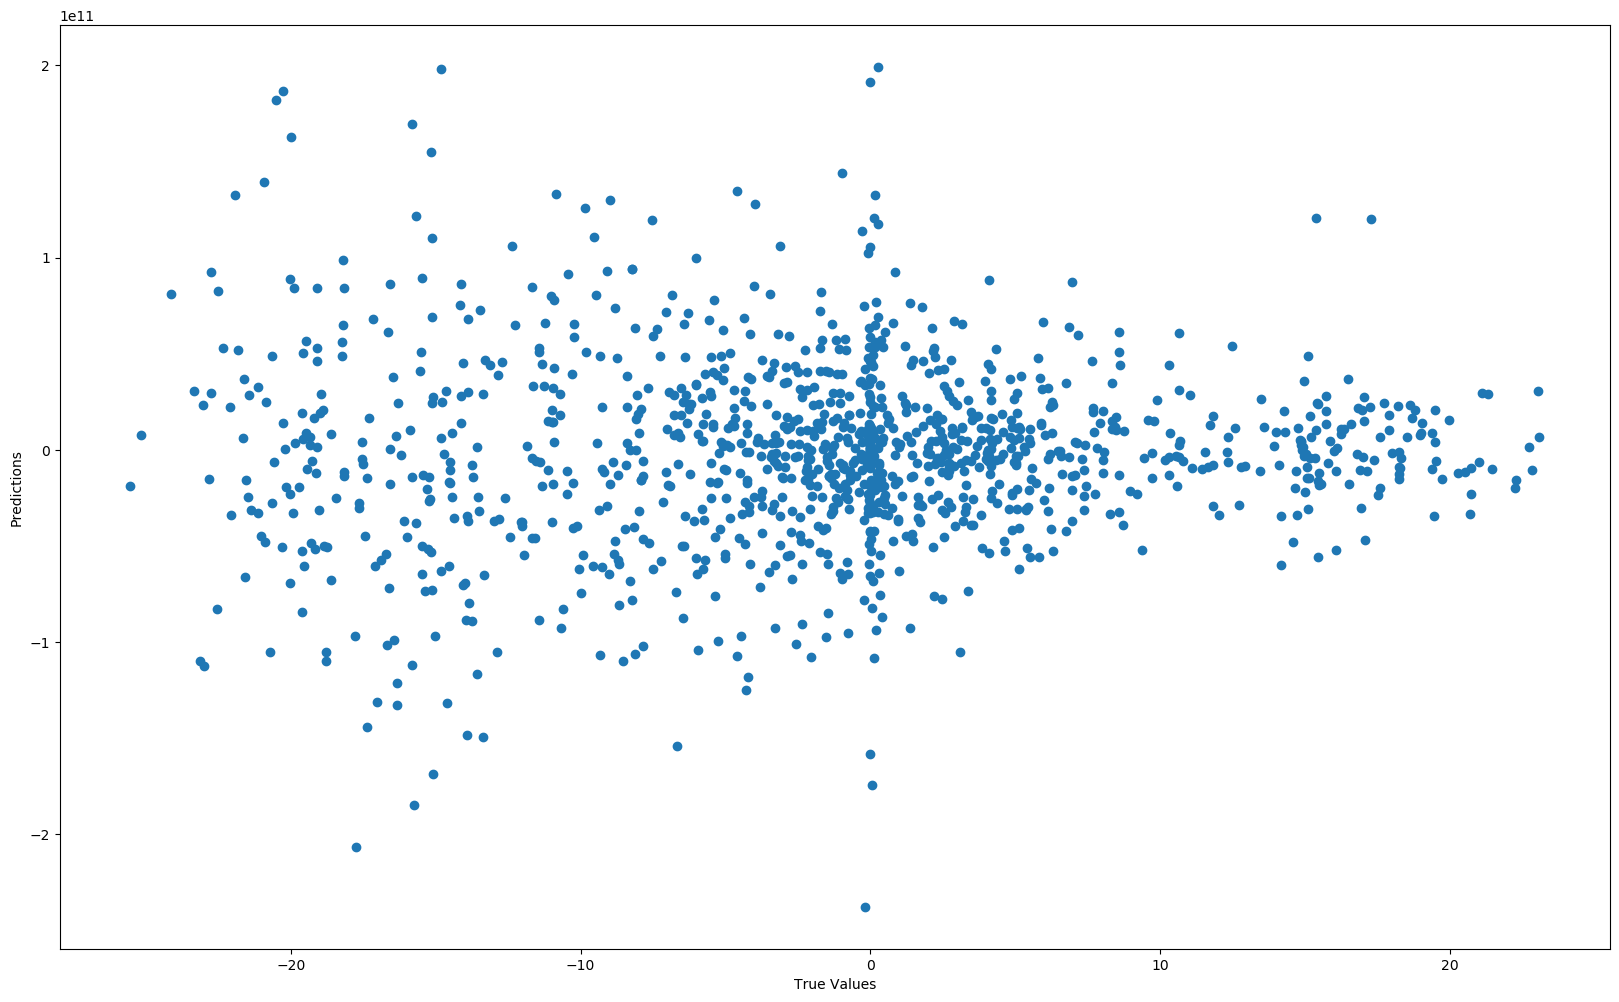

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()